In [36]:
from genalog.pipeline import AnalogDocumentGeneration
from genalog.degradation.degrader import ImageState
from genalog.degradation import effect
import requests

from genalog.degradation.degrader import Degrader, ImageState
from genalog.generation.content import CompositeContent, ContentType
from genalog.generation.document import DEFAULT_STYLE_COMBINATION
from genalog.generation.document import DocumentGenerator
from weasyprint import HTML
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image, ImageDraw as D



(368, 368)


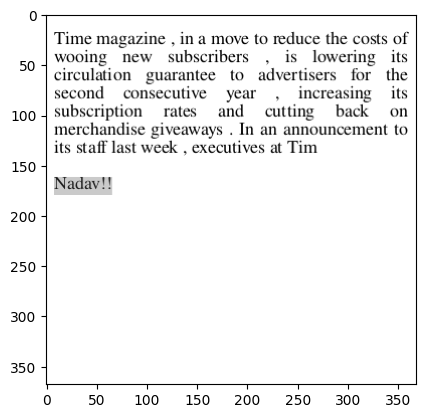

In [33]:
STYLE_COMBINATIONS = {
    "language": ["en_US"],
     "font_family": ["Garamond"],
     "font_size": ["18px"],
     "text_align": ["justify"],
     "hyphenate": [False],
     "width": ["368px"],
     "height": ["368px"],
     "top_margin": ["0px"],
     "right_margin": ["0px"],
     "bottom_margin": ["0px"],
     "left_margin": ["0px"],

}

HTML_TEMPLATE = "pixel_block.html.jinja"

DEGRADATIONS = [
    ("blur", {"radius": 2}),
    ("bleed_through", {
        "src": ImageState.CURRENT_STATE,
        "background": ImageState.ORIGINAL_STATE,
        "alpha": 0.8,
        "offset_x": -6,
        "offset_y": -12,
    }),
    ("morphology", {"operation": "open", "kernel_shape":(9,9), "kernel_type":"plus"}),
    ("pepper", {"amount": 0.005}),
    ("salt", {"amount": 0.15}),
]

sample_text_url = "https://raw.githubusercontent.com/microsoft/genalog/main/example/sample/generation/example.txt"
sample_text = "example.txt"

r = requests.get(sample_text_url, allow_redirects=True)
sample_text = r.text[:300]
sample_text += '<br><br><span style=color:blue;background:gold;>Nadav!!</span>'

IMG_RESOLUTION = 96 # dots per inch (dpi) of the generated pdf/image
doc_generation = AnalogDocumentGeneration(styles=STYLE_COMBINATIONS, degradations=[], resolution=IMG_RESOLUTION, template_path=None)

img_array = doc_generation.generate_img(sample_text, HTML_TEMPLATE, target_folder=None, channel='GRAYSCALE') # returns the raw image bytes if target_folder is not specified
print(img_array.shape)
plt.imshow(img_array, cmap='gray')

In [34]:
res = pytesseract.image_to_string(img_array)
print(res)

Time magazine , in a move to reduce the costs of

wooing new subscribers , is lowering its

circulation guarantee to advertisers for the

second consecutive year , increasing its
ibscription rates and cutting back on

merchandise giveaways . In an announcement to
staff last week , executives at Tim

Nadav!!



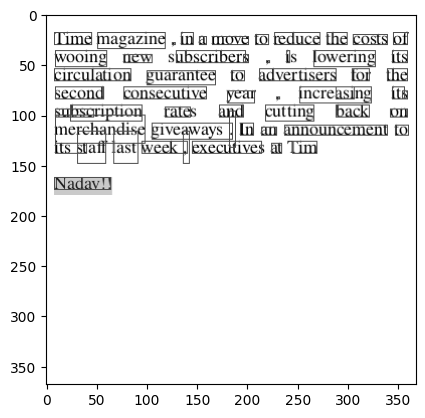

In [43]:
d = pytesseract.image_to_data(img_array, lang='eng', output_type=pytesseract.Output.DICT)
img = Image.fromarray(img_array)
draw=D.Draw(img)
n_boxes = len(d['level'])
for i in range(n_boxes):
    if d["text"][i] == "":
        continue
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    # add a rectangle to the image
    draw.rectangle(((x, y), (x + w, y + h)), outline='red')
plt.imshow(img, cmap='gray')